In [1]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#explicitally created classes to preproces data,to split data into training and testing set,to cheack accuracy of model 
from preprocessing import splitter
from preprocessing import Encoder
from metrics import matrix
from treeVis import vis
sp=splitter()
mt=matrix()
vs=vis()
en=Encoder()

/home/sohel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#importing dataset
dataset=pd.read_csv("iris.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


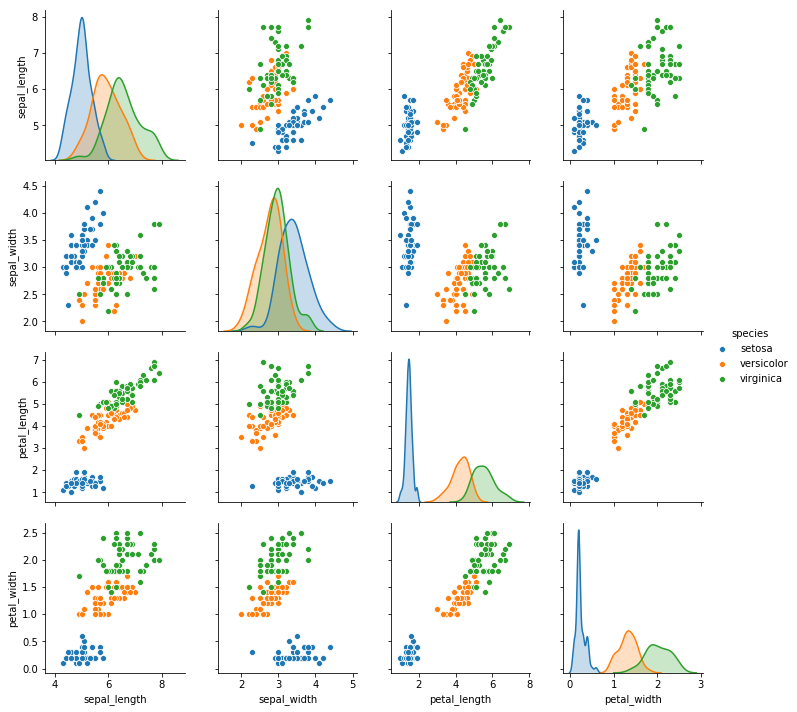

In [4]:
sb.pairplot(dataset,hue='species',vars=['sepal_length','sepal_width','petal_length','petal_width'])
plt.show()

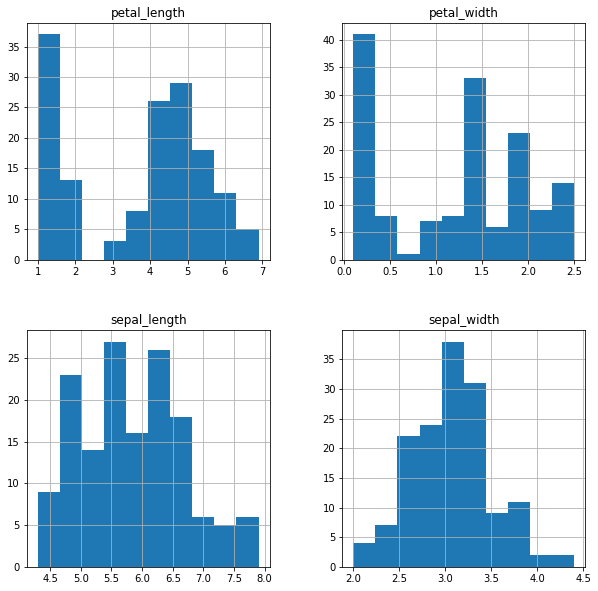

In [5]:
#plotting histogram to visualise each attribute of dataset
dataset.hist(figsize=(10,10))
plt.show()

In [6]:
#deviding dataset into dependant and independant dataset
x=dataset.iloc[:,0:4].values #independant
y=dataset.iloc[:,-1] #dependant

y=np.array(y)
y=y.reshape(150,1)

In [7]:
#encoding the categorical data 
y[:,0]=en.labelEncoding(y[:,0])
y=en.one_hot_encoder(y,0)

In [8]:
#avoiding dummy variable trap by removing one of colomn from y
y=y[:,1:]

In [9]:
#splitting data into training and testing sets
x_train,x_test,y_train,y_test=sp.decomposition(x,y)

In [10]:
#fitting training data to decision tree model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [11]:
#prediction for x_test
y_pred=dtc.predict(x_test)

In [12]:
#cheaking accuracy of model
accuracy=mt.accuracy(y_pred,y_test)
print("{}%".format(accuracy*100))

100.0%


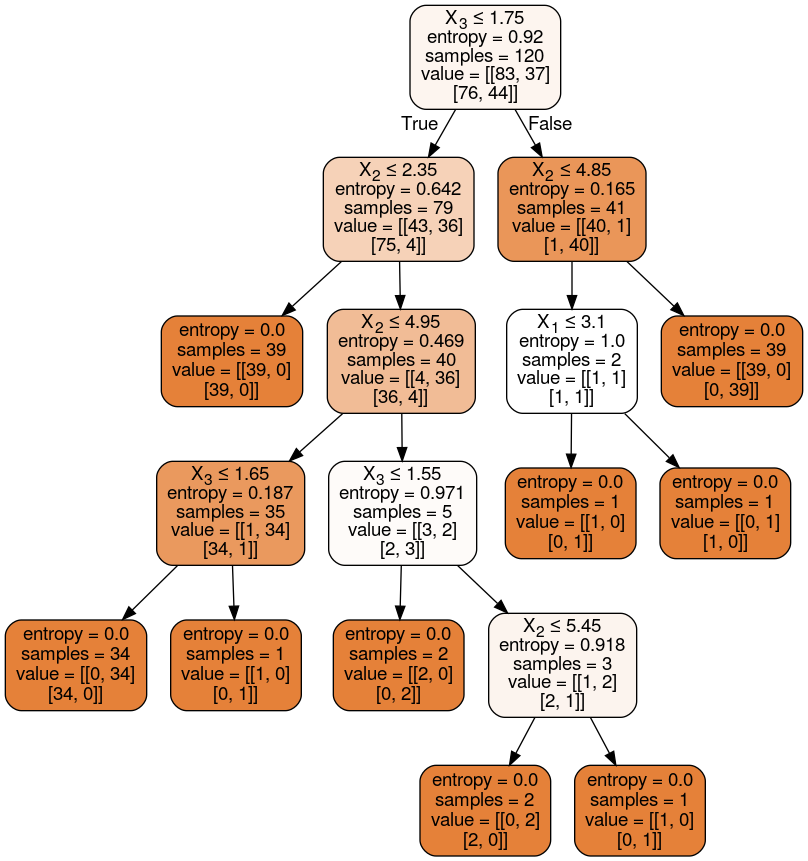

In [13]:
#visualization of decision tree
vs.dtree_visual(dtc)